In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

W = np.random.randn(X.shape[1])
W

array([-0.99666938, -0.36654775, -1.97775417, -0.84934938])

In [5]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [6]:
stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 3.0986442   0.65191905 -0.55350375  0.53288255], error 3089.8665795997254
Iter: 500, weights: [57.05966446  6.07559376 -0.76217876  6.94902162], error 25.238263236871205
Iter: 1000, weights: [57.05298076  6.12290095 -0.96161828  7.11162657], error 25.264135938665415
Iter: 1500, weights: [57.05250522  6.12619777 -0.97571944  7.12316817], error 25.26650885713548
Iter: 2000, weights: [57.05247156  6.1264311  -0.9767175   7.12398508], error 25.266679485288908
Iter: 2500, weights: [57.05246918  6.12644762 -0.97678814  7.1240429 ], error 25.266691575552
Iter: 3000, weights: [57.05246901  6.12644879 -0.97679314  7.12404699], error 25.266692431354393
Iter: 3500, weights: [57.052469    6.12644887 -0.9767935   7.12404728], error 25.26669249192746
Iter: 4000, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.26669249621478
Iter: 4500, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.266692496518196
Final MSE: 25.350

array([57.052469  ,  6.12644888, -0.97679353,  7.1240473 ])

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [8]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.91726659  0.2429124  -0.24997404  0.51140422], error 3379.910235034253
Iter: 500, weights: [56.49489619  5.95006067  0.99702636  5.52339786], error 25.219532016063134
Iter: 1000, weights: [56.49717505  6.19949201  0.12430239  6.1783235 ], error 24.94525715622309
Iter: 1500, weights: [56.49717514  6.26656455 -0.18255095  6.4282528 ], error 24.90996333313266
Iter: 2000, weights: [56.49717514  6.28953561 -0.29258083  6.51889964], error 24.90534630692182
Iter: 2500, weights: [56.49717514  6.29774044 -0.33214669  6.5515483 ], error 24.904730762770733
Iter: 3000, weights: [56.49717514  6.30068918 -0.34638001  6.56329594], error 24.9046446268955
Iter: 3500, weights: [56.49717514  6.30174987 -0.35150055  6.56752238], error 24.904631151810424
Iter: 4000, weights: [56.49717514  6.30213146 -0.35334272  6.56904289], error 24.904628570703952
Iter: 4500, weights: [56.49717514  6.30226874 -0.35400547  6.56958992], error 24.90462793549744
Final MSE: 24.904627744945806


array([56.49717514,  6.30231807, -0.35424362,  6.56978649])

Iter: 0, weights: [-0.67618301  0.64864984  0.1975439   1.17844917], error 3534.504940277226
Iter: 500, weights: [56.49737204  5.95318477  0.9590995   5.55942234], error 25.201551533180098
Iter: 1000, weights: [56.49971741  6.20266185  0.10918732  6.19097355], error 24.94271452611036
Iter: 1500, weights: [56.4997175   6.26820552 -0.189099    6.43359758], error 24.90956061255453
Iter: 2000, weights: [56.4997175   6.29055553 -0.29606954  6.52170721], error 24.90526185908511
Iter: 2500, weights: [56.4997175   6.29853634 -0.33455081  6.55346003], error 24.904703231638354
Iter: 3000, weights: [56.4997175   6.30140557 -0.3484001   6.56489067], error 24.904630234903944
Iter: 3500, weights: [56.4997175   6.30243811 -0.35338474  6.56900493], error 24.904620552011785
Iter: 4000, weights: [56.4997175   6.30280974 -0.35517882  6.57048575], error 24.904619216106774
Iter: 4500, weights: [56.4997175   6.3029435  -0.35582456  6.57101874], error 24.90461901370055
Final MSE: 24.904618976917344
Iter: 0, 

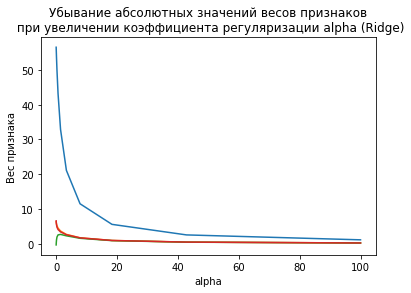

In [31]:
n=20
coeffs1 = np.zeros((n, X.shape[1]))
alpha_list = np.logspace(-5, 2, n)

for i, val in enumerate(alpha_list):
    reg1 = val
  
    coeffs1[i, :] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=reg1)

for i in range(X.shape[1]):
    plt.plot(alpha_list, coeffs1[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака');

In [ ]:
Вывод: при увеличение alfa уменьшаются веса, но увеличивается ошибка.

In [ ]:
Задание 2 (Cылка на вычисление производной не открылась, но по логике так:) В итогах разницы особой не увидела, чуть меньше ошибка.

In [32]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [33]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 1.09547752  0.68713542 -0.06389205 -0.77270614], error 3375.320061608966
Iter: 500, weights: [56.49767709  5.94143341  1.22446574  5.29918079], error 25.340483920061057
Iter: 1000, weights: [56.49994991  6.18418677  0.20907552  6.10638168], error 24.961012910175832
Iter: 1500, weights: [56.49995     6.26075991 -0.15276656  6.40353814], error 24.911942838679245
Iter: 2000, weights: [56.49995     6.28775168 -0.28272357  6.51073466], error 24.90557733440321
Iter: 2500, weights: [56.49995     6.29744316 -0.32949298  6.54933428], error 24.904746536960623
Iter: 3000, weights: [56.49995     6.3009303  -0.34632684  6.56322866], error 24.904636706132212
Iter: 3500, weights: [56.49995     6.30218541 -0.35238603  6.56822986], error 24.904621686802873
Iter: 4000, weights: [56.49995     6.30263717 -0.35456698  6.57003001], error 24.90461945662055
Iter: 4500, weights: [56.49995     6.30279978 -0.355352    6.57067796], error 24.904619065348054
Final MSE: 24.904618977821116


array([56.49995   ,  6.30285824, -0.35563423,  6.57091091])

Задание 3:Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию . Да можно (можно то, что не нельзя :)), но по факту будет выполненно то, что сделано последним. И смысл применения обоих методов от этого теряется.